In [1]:
#ensure current version is being implemented and home directory is correct for computer
experiment_name = "analysing_MBC"
folder = "investigating_breast_cancer/MBC"
computer = "ciara"
dataset_name = "MBC"

#creating new folder to hold results for experiment in project path 
import sys
sys.path.append(F"C:/Users/{computer}/OneDrive/Documents/GitHub/ciaratools")
sys.path.append(F"C:/Users/{computer}/OneDrive/Documents/GitHub/")

from ciaratools import experiments, data_collections
project_directory = F"C:/Users/{computer}/OneDrive/Documents/PhD File Transfer/Projects/Jurek Orr/MBC/ballmapper/"
output_path = experiments.results_folder(project_directory, experiment_name)

C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
import pylab as pl
%matplotlib inline


Bad key text.latex.preview in file C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

In [3]:
from pyballmapper import BallMapper
from pyballmapper.plotting import graph_GUI
from bokeh.plotting import figure, show
from matplotlib import cm

In [4]:
# this cell allows for bokeh plots to be displayed inside jupyter notebooks
from bokeh.io import output_notebook
output_notebook() #opens in new tab

Loading BokehJS ...

## Load in M1/M2 genes for MBC 
- 118 genes defined M1/M2 subgroups 
- 114 MBC patients 
- provided by Sarah Oct 2019

In [5]:
#TRAINING DATA
data_file = data_collections.AccessData(d=dataset_name, l=computer)
X_df = data_file.load_file("MBC_M1_M2_genes_zscored")
X = np.array(X_df)
print(X.shape)

(114, 118)


In [6]:
X_df

,ABCC5,ACP5,ADD3,ADM,AGPS,AGTR1,ANG,ANGPTL2,BAMBI,BCL2,...,SNAI2,STEAP4,SYT13,TEAD2,TGFBR3,TMEM47,TPM2,TRIB2,UGDH,ZNF407
E750001,0.253451,-0.297333,1.012159,-0.617092,0.836521,-1.424981,-2.228945,1.042002,0.502575,0.885422,...,0.623904,0.735835,-0.304014,-0.349326,-0.145263,0.153912,-1.011819,0.286756,-0.388030,-0.050657
E750002,-1.031560,0.879266,-1.330078,-0.197073,0.501338,-1.190966,0.712487,-0.150703,1.206220,-0.421320,...,-0.692690,-0.703573,0.664490,-0.050085,0.165073,-0.653043,-0.513932,-0.931364,0.304787,-0.667373
E750003,0.247912,0.171030,-0.985662,-0.531525,-0.305078,0.019610,-1.011084,-1.682104,-2.559110,0.483155,...,-0.261743,0.699613,-0.336977,0.606629,-1.451851,-1.317039,-0.815216,-0.570739,-0.089155,-1.131994
E750004,-0.437684,0.710787,0.294013,-0.017421,-1.133593,-0.194005,0.688799,1.211478,0.905928,-0.677289,...,-0.049386,-0.504916,-0.193966,-0.303692,-0.215235,-0.426701,0.712716,-0.574526,-1.319324,-0.779849
E750005,0.378091,0.191160,0.020066,0.063599,-0.330622,-0.463840,-0.054841,1.030727,0.277716,-1.561387,...,0.725075,-1.195249,-0.108091,-0.853266,-0.724007,-0.213040,0.831669,0.050808,-0.557615,-0.240627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E750141,-0.080045,-0.960472,-0.912289,0.823467,-0.514360,-0.196166,-2.228945,0.330043,0.071565,-0.284584,...,0.651693,-0.728726,-0.297296,-0.322173,-0.237069,-0.214439,1.183196,-0.339203,-0.095658,0.281307
E750142,0.898803,1.365941,-1.997114,-0.378944,2.247346,-0.003638,-0.442872,-1.816810,-1.272945,0.689471,...,-1.651458,1.347409,1.040369,0.454918,1.757172,-1.233094,-1.004944,-1.259183,0.916434,1.496238
E750143,0.126602,-0.111285,2.571395,-0.182331,0.355881,1.155546,0.257597,0.851978,-0.189479,1.250518,...,1.760239,1.675410,1.142436,-0.067319,-0.132946,0.366877,-0.308443,0.579029,0.271159,-0.952793
F29_0005,1.707754,-0.012012,-0.681396,-0.599411,-1.502841,0.258131,0.680593,-0.809518,-0.555506,0.254843,...,-1.134420,-0.553300,2.002191,1.255183,-0.105357,-0.677411,-0.179245,-0.420242,0.501987,-1.511547


In [7]:
# Colour by NAT1 expression - low = M1, high = M2
y_df = X_df["NAT1"]
y_df = y_df.reset_index()
print(y_df)

        index      NAT1
0     E750001  1.040136
1     E750002 -0.668197
2     E750003 -0.188314
3     E750004 -1.689925
4     E750005  0.351781
..        ...       ...
109   E750141 -0.042633
110   E750142  0.897551
111   E750143  0.841961
112  F29_0005  0.390456
113  F29_0006 -1.382121

[114 rows x 2 columns]


## Build BallMapper graph

after some exploratory analysis, correlation distance and eps = 0.647 was identified to show two clusters. I selected 0.647 as the epsilon value before the two clusters conjoin, minimizing the number of outliers 

In [8]:
from scipy.spatial.distance import correlation

EPS = 0.647

bm = BallMapper(points = X_df.values, # the pointcloud, as a numpy array
                    epsilon = EPS,
                    distance = correlation,
                    dbg=True) # the radius of the balls

bm.add_coloring(coloring_df=y_df[['NAT1']])
palette = cm.get_cmap(name='plasma')

bm_gui = graph_GUI(bm.Graph,
                          palette,
                          tooltips_variables=['NAT1'])
bm_gui.color_by_variable('NAT1')
show(bm_gui.plot)


using custom distance <function correlation at 0x00000160F6084678>
Finding vertices...


  0%|          | 0/114 [00:00<?, ?it/s]

Computing points_covered_by_landmarks...


  0%|          | 0/45 [00:00<?, ?it/s]

Finding edges...


0it [00:00, ?it/s]

Creating Ball Mapper graph...
Done
color by variable NAT1 
MIN_VALUE: -2.152, MAX_VALUE: 1.248


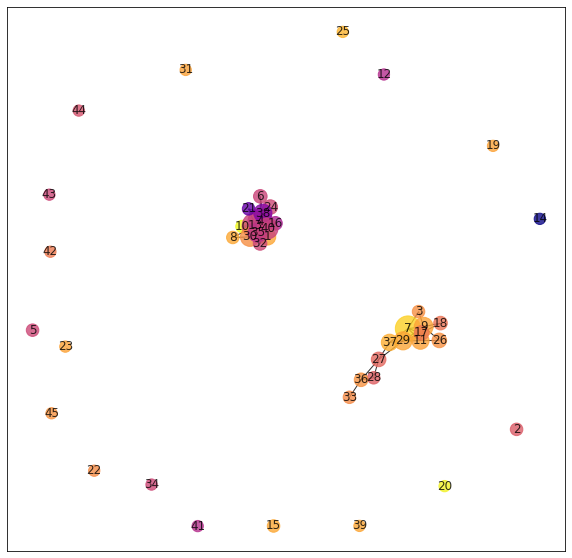

Text(0.5, 1.0, 'NAT1 expression')

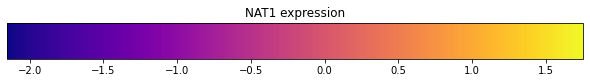

In [9]:
plt.figure(figsize = (10,10))
# The BallMapper class has a builtin plotting method, buit around nx.draw_networkx
bm.draw_networx(coloring_variable='NAT1', color_palette=palette)
plt.show()



pl.figure(figsize=(8, 0.5))
img = pl.imshow(np.array([[y_df[['NAT1']].min(), y_df[['NAT1']].max()]]), cmap="plasma")
pl.gca().set_visible(False)
cax = pl.axes([1,1,1,1])
pl.colorbar(orientation="horizontal", cax=cax)
pl.title("NAT1 expression")

## Track the components to select an appropriate epsilon value

Davide provided supporting function to:

1. Run BM for each eps value in a list of radii 
2. Track the connected components as they change size when the radii increases

In [10]:
output = {}

# array of radii
radii_list =[i/20.0 for i in range(1, 21)]
is_sorted = lambda a: np.all(a[:-1] <= a[1:])
assert(is_sorted(radii_list))
print(f"Radii list: {radii_list}")

# run BM on the first radius
cc_dict = {}
bm = BallMapper(points = X,     # the pointcloud, as a numpy array
                epsilon = radii_list[0],
               distance = correlation)  # the radius of the balls

# iterate through a sorted list of connected components, largest first.
for i, cc in enumerate(sorted(nx.connected_components(bm.Graph), key=len, reverse=True)):
    # for each connected components, find the set of points covered by its nodes
    points_in_cc = set().union(*[bm.points_covered_by_landmarks[idx] for idx in cc])
    cc_dict[i] =  points_in_cc

output[radii_list[0]] = cc_dict

# run BM for the other radii and keep track of how the connected components
# evolve
for i, eps in enumerate(radii_list[1:], start=1):
    cc_dict = {}
    bm = BallMapper(points = X,     # the pointcloud, as a numpy array
                    epsilon = eps,
                   distance = correlation)  # the radius of the balls

    # in order to be consistent with the naming, look for cc in the previous BM
    # that contains some of the points in the current cc
    # iterate through a sorted list of connected components, largest first.
    for cc in sorted(nx.connected_components(bm.Graph), key=len, reverse=True):
        # for each connected components, find the set of points covered by its nodes
        points_in_cc = set().union(*[bm.points_covered_by_landmarks[idx] for idx in cc])
        # look for the first cc in the previous bm that is a subset of the current cc
        # this will be the name for our current cc
        for old_cc_name in sorted(output[radii_list[i-1]].keys()):
            if output[radii_list[i-1]][old_cc_name].issubset(points_in_cc):
                break
        cc_dict[old_cc_name] =  points_in_cc

    output[eps] = cc_dict

Radii list: [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


- There is a gradual increase in the number of connected components 
- difficult to select an appropriate epsilon value were clusters are stable

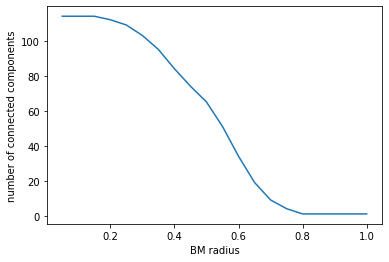

In [11]:
# lets see how the number of cc varies
fig, ax = plt.subplots()

ax.plot(radii_list, [len(output[eps].keys()) for eps in output])

ax.set_xlabel('BM radius')
ax.set_ylabel('number of connected components')
plt.show()

- If we only consider connected components that survive until a specified radii
(e.g. min_eps = 5, or min_eps = 0.65)
- what value should we chose?
- how does this help us pick a final radii

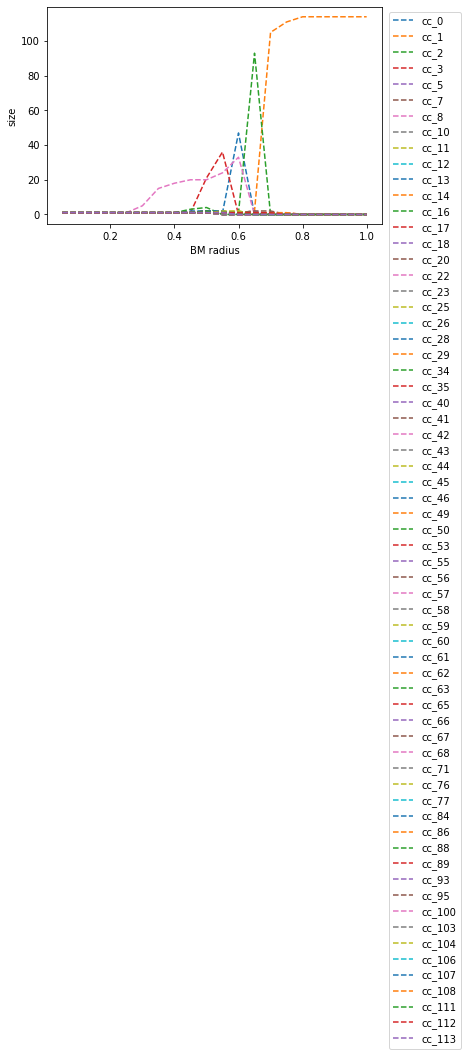

In [12]:
## MIN EPSILON = 0.5

fig, ax = plt.subplots()

# we plot the size of the cc that survive at least till min_eps = 0.5
min_eps = 0.5
for cc_id in sorted(output[min_eps].keys()): 
    ax.plot(radii_list, [len(output[key].get(cc_id, [])) for key in output],
            label = 'cc_{}'.format(cc_id), linestyle='dashed')

ax.set_xlabel('BM radius')
ax.set_ylabel('size')

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

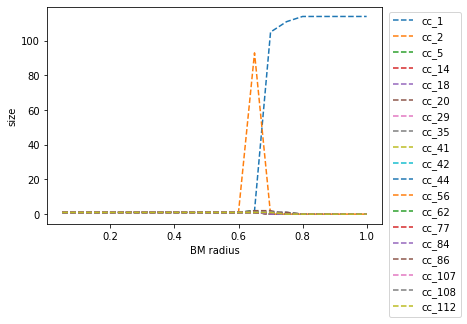

In [13]:
## MIN EPSILON = 0.65
fig, ax = plt.subplots()

# we plot the size of the cc that survive at least till min_eps = 0.5
min_eps = 0.65
for cc_id in sorted(output[min_eps].keys()): 
    ax.plot(radii_list, [len(output[key].get(cc_id, [])) for key in output],
            label = 'cc_{}'.format(cc_id), linestyle='dashed')

ax.set_xlabel('BM radius')
ax.set_ylabel('size')

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

In [14]:
## this are the ids of the clusters at different radii
## note that the clusters id are integers, not cc_i !! 
for k in output:
    print(f"radii = {k}\ncc_id = {output[k].keys()}\n\n")

radii = 0.05
cc_id = dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113])


radii = 0.1
cc_id = dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113])


radii = 0.1

In [15]:
## we can have a look at the size of all connected-components identified for each radii value

for k in output:
    print(f"radii = {k}")
    
    cc_id_size = []
    for cc_id in output[k]:   
        cc_id_size.append(len(output[k][cc_id]))
    
    print(f"\nsize of cc_id = {[cc_id_size]}\n\n")

radii = 0.05

size of cc_id = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


radii = 0.1

size of cc_id = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


radii = 0.15

size of cc_id = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,